In [2]:
import tarfile
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
plt.set_cmap("gray") # Otherwise grayscale images look purple
%matplotlib inline

In [3]:
# url = 'http://udon.stacken.kth.se/~ninjin/comp0090_assignment_1_data.tar.gz'
# ftpstream = urllib.request.urlopen(url)
# tar = tarfile.open(fileobj=ftpstream, mode="r|gz")
# tar.extractall()
# tar.close

In [4]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0)).reshape(-1, 784)
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0)).reshape(-1, 784)
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")

In [5]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)

(12000, 784)
(12000,)
(1000, 784)
(1000,)


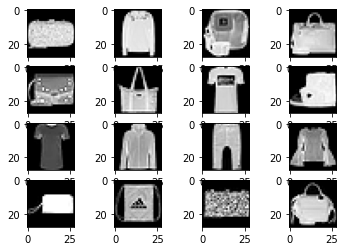

In [6]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))].reshape(28, 28))

In [7]:
# function to create weight and sum parameters for the algorithm
def initialise_parameters(xs):
    w = np.zeros(xs.shape[1])
    b = np.zeros(1)
    return w, b

In [8]:
def logistic_func(x):
    return 1/(1 + np.exp(-x))

def logistic_der(x):
    return logistic_func(x) * (1 - logistic_func(x))

def f(x, w, b):
    return logistic_func(np.dot(w, x) + b)

def p(x, w, b):
    if f(x, w, b) >= 0.5:
        return 1
    return 0

In [9]:
#Measure Accuracy

def accuracy(xs, ys, w, b):
    correct = 0
    for i in range(xs.shape[0]):
        if p(xs[i], w, b) == ys[i]:
            correct += 1
    return correct/len(xs)*100    

In [10]:
#Loss Function

def loss_func(trainys, y_predict):
    sum = 0
    n = trainys.shape[0]
    for i in range(n):
        sum += (trainys[i] - y_predict[i]) ** 2
    return 1/2*n*sum

In [11]:
#Loss Function for single points

def loss(y, y_hat):
    return ((y - y_hat) ** 2) / 2

In [12]:
def logistic_regression(trainxs, trainys, devxs, devys):
    w, b = initialise_parameters(trainxs)
    
    accuracy_training = []
    accuracy_validation = []
    
    # store predicted y's and loss for each epoch
    y_predict = []
    loss_training = []
    
    # store old accuracy and consecutive epochs count to detect convergence
    acc_old = accuracy(trainxs, trainys, w, b)
    row_epoch = 0
    
    # store number of epochs to have a nice graph
    epoch = 0
    learning_rate = 0.1
    
    while True:
        print('Epoch', epoch)
        trainxs, trainys = shuffle(trainxs, trainys)
        grad_w, grad_b = initialise_parameters(trainxs)
        y_predict = []

        for i in range(trainxs.shape[0]):
            y_hat = f(trainxs[i], w, b)
            y_predict.append(y_hat)
            grad_w += trainxs[i] * (y_hat - trainys[i]) * (1 - y_hat) * y_hat 
            grad_b += (y_hat - trainys[i]) * (1 - y_hat) * y_hat 

        grad_w /= trainxs.shape[0]
        grad_b /= trainxs.shape[0]
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        accuracy_train = accuracy(trainxs, trainys, w, b)
        accuracy_training.append(accuracy_train)
        print('Training set accuracy:', accuracy(trainxs, trainys, w, b))
        accuracy_dev = accuracy(devxs, devys, w, b)
        accuracy_validation.append(accuracy_dev)
        print('Validation set accuracy:', accuracy_dev)
        
        loss_train = loss_func(trainys, y_predict)
        loss_training.append(loss_train)
        print('Training set loss:', loss_train)
        
        # check if converged
        if np.abs(accuracy_dev - acc_old) < 0.0001:
            row_epoch += 1
            if row_epoch == 5:
                break
        else:
            row_epoch = 0
            
        acc_old = accuracy_dev
        epoch += 1
    
    return epoch, accuracy_training, accuracy_validation, loss_training

In [13]:
epoch, accuracy_training, accuracy_validation, loss_training = logistic_regression(trainxs, trainys, devxs, devys)

Epoch 0
Training set accuracy: 55.95833333333333
Validation set accuracy: 56.89999999999999
Training set loss: [18000000.]
Epoch 1
Training set accuracy: 66.4
Validation set accuracy: 68.4
Training set loss: [16931565.4689482]
Epoch 2
Training set accuracy: 71.98333333333333
Validation set accuracy: 71.89999999999999
Training set loss: [16148409.75978881]
Epoch 3
Training set accuracy: 76.40833333333333
Validation set accuracy: 76.2
Training set loss: [15455166.59684597]
Epoch 4
Training set accuracy: 78.34166666666667
Validation set accuracy: 78.8
Training set loss: [14840650.9328668]
Epoch 5
Training set accuracy: 79.48333333333333
Validation set accuracy: 80.2
Training set loss: [14296304.13774791]
Epoch 6
Training set accuracy: 80.15
Validation set accuracy: 80.7
Training set loss: [13813186.26813026]
Epoch 7
Training set accuracy: 80.48333333333333
Validation set accuracy: 81.10000000000001
Training set loss: [13382821.1531767]
Epoch 8
Training set accuracy: 80.80833333333334
Vali

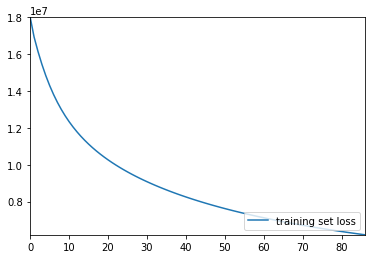

In [14]:
plt.axis([0, epoch, min(loss_training), max(loss_training) + 0.1])
plt.plot(loss_training, label='training set loss')
plt.legend(loc='lower right')

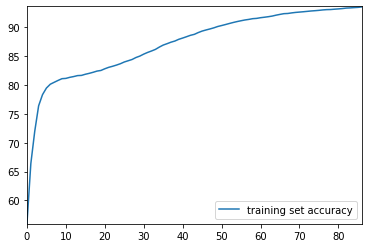

In [15]:
plt.axis([0, epoch, min(accuracy_training), max(accuracy_training) + 0.1])
plt.plot(accuracy_training, label='training set accuracy')
plt.legend(loc='lower right')

In [16]:
ind = accuracy_validation.index(max(accuracy_validation))
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])

Best epoch = 81
Accuracy on training set = 93.25833333333333
Accuracy on validation set = 94.5


In [34]:
def flatten(w, b):
    toflatten = (w, b)
    vec = np.zeros(sum(param.shape[0] for param in toflatten))
    offset = 0
    for parameter in toflatten:
        vec[offset:offset + len(parameter)] = parameter
        offset += len(parameter)
    return vec

def unflatten(w, b, vec):
    tounflatten = (w, b)
    offset = 0
    for parameter in tounflatten:
        parameter[:] = vec[offset:offset + len(parameter)]
        offset += len(parameter)
    return tounflatten

In [35]:
def fdfprime(w, b, x, y):
    epsilon  = 0.000001
    grad_w, grad_b = initialise_parameters(x[np.newaxis, :])
    vecm     = flatten(w, b)
    vecgradm = flatten(grad_w, grad_b)
    
    for i in range(len(vecm)):
        wi           = vecm[i]

        vecm[i]     += epsilon/2   
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        y_pred = logistic_func(np.dot(w_j, x) + b_j)
        r            = loss(y, y_pred)
        
        vecm[i]      = wi
        vecm[i]     -= epsilon/2
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        y_pred = logistic_func(np.dot(w_j, x) + b_j)
        l = loss(y, y_pred)
        vecgradm[i]  = (r - l)/epsilon

        vecm[i]      = wi

    return unflatten(grad_w, grad_b, vecgradm)

In [52]:
def fprime(w, b, x, y):
    grad_w, grad_b = initialise_parameters(x[np.newaxis, :])
    
    #Forward pass
    y_hat = f(x, w, b)
    
    #Backward pass
    grad_z = (y_hat - y) * (1 - y_hat) * y_hat # MSE * Sigmoid Derivative
    grad_w = grad_z * x
    grad_b = grad_z
    
    return grad_w, grad_b

In [64]:
x = trainxs[0]
y = trainys[0]
w, b = initialise_parameters(trainxs)
grad_w, grad_b = fprime(w, b, x, y)
fd_grad_w, fd_grad_b = fdfprime(w, b, x, y)

print("Max w difference:", (fd_grad_w - grad_w).max())
print("Max b difference:", (fd_grad_b - grad_b).max())

Max w difference: 7.890284259293168e-11
Max b difference: -7.967226878236033e-11
